# Mini-BMN Notebook

Expand mini-BMN hamiltonian into Pauli strings

To Do
- add comments
- check units
- how to simulate? what to simulate?
- fuzzy spheres

In [1]:
import qiskit
import numpy as np
import sympy as sp
from collections import Counter
from qiskit.circuit import Parameter, ParameterVector, ParameterExpression
from qiskit.quantum_info import Pauli, Operator, SparsePauliOp
#from symengine.lib.symengine_wrapper import Zero as spZero
import symengine.lib.symengine_wrapper as symengine_wrapper
from utils import SpecialUnitaryGroup, BMNModel
from typing import Union

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from cycler import cycler

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rc('font', family='serif',size=14)
#matplotlib.rc('text', usetex=True)
matplotlib.rc('legend', fontsize=14)
plt.rcParams['ytick.minor.size'] = 3.0
matplotlib.rcParams.update({"axes.grid" : True,
                            "grid.alpha": 0.75,
                            "grid.linewidth": 0.5})
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Blah

In [3]:
bmn = BMNModel(gauge_group_degree=2, bits_per_oscillator=1)
nu = Parameter('nu')
bmn.hamiltonian(nu)

number_qubits 9, Hilbert space dimension 512


SparsePauliOp(['IIIIIIIII', 'XIIIXIIIX', 'XIIIIXIXI', 'IXIXIIIIX', 'IXIIIXXII', 'IIXXIIIXI', 'IIXIXIXII', 'XXIXXIIII', 'XIXXIXIII', 'IXXIXXIII', 'XXIIIIXXI', 'XIXIIIXIX', 'IXXIIIIXX', 'IIIXXIXXI', 'IIIXIXXIX', 'IIIIXXIXX'],
              coeffs=[ParameterExpression(2.25*nu**2 + 4.5),
 ParameterExpression(-2.12132034355964*nu),
 ParameterExpression(2.12132034355964*nu),
 ParameterExpression(2.12132034355964*nu),
 ParameterExpression(-2.12132034355964*nu),
 ParameterExpression(-2.12132034355964*nu),
 ParameterExpression(2.12132034355964*nu), (-0.25000000000000006+0j),
 (-0.25000000000000006+0j), (-0.25000000000000006+0j),
 (-0.25000000000000006+0j), (-0.25000000000000006+0j),
 (-0.25000000000000006+0j), (-0.25000000000000006+0j),
 (-0.25000000000000006+0j), (-0.25000000000000006+0j)])

In [8]:
nu_values = np.linspace(0.1, 10, 10)
eigs = {}

for nu_value in nu_values:
    Hmat = bmn.hamiltonian(nu).assign_parameters({nu:nu_value}).to_matrix(sparse=False)

    # extract eigenvalues
    x = np.linalg.eigvals(Hmat)
    xR = np.real(x)
    xI = np.imag(x)
    # chop
    xR[np.isclose(xR, 0)] = 0
    xI[np.isclose(xI, 0)] = 0
    # verify eigenvalues are real
    assert np.array_equal(xI, np.zeros(len(xI)))

    eigs[nu_value] = xR

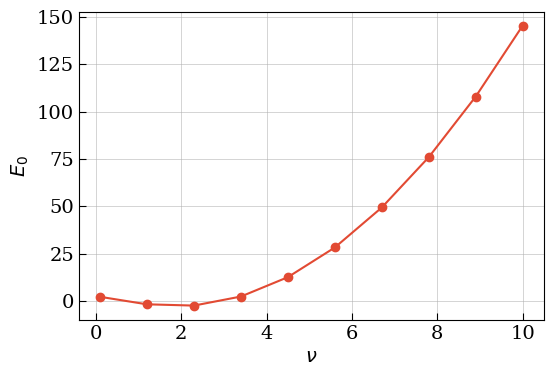

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(nu_values, [np.min(v) for v in eigs.values()], '-o')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$E_0$')
plt.show()

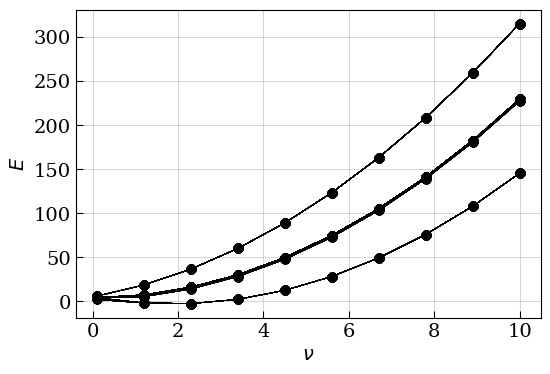

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(2**bmn.num_qubits):
    ax.plot(nu_values, [np.sort(eigs[nu_value])[i] for nu_value in nu_values], '-o', color='k', linewidth=0.5)
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$E$')
#ax.set_yscale('log')
plt.show()

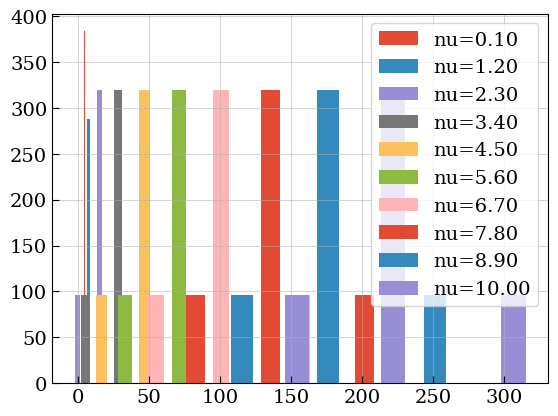

In [39]:
from collections import Counter

for nu_value in nu_values:
    plt.hist(eigs[nu_value], bins=10, label=f'nu={nu_value:.02f}')
plt.legend()
plt.show()

In [ ]:
def maximum_weight_of_sparse_pauli(operator: SparsePauliOp) -> int:
    return max([bmn.num_qubits - p.__str__().count("I") for p in operator.paulis])

In [ ]:
# max pauli weight of creation operators
for matrix_idx in range(bmn.num_matrices):
    for generator_idx in range(bmn.num_matrices):
        print(maximum_weight_of_sparse_pauli(bmn.creation_operator(matrix_idx=matrix_idx, generator_idx=generator_idx)))